# SEA Building Energy Benchmarking - Modélisation

# Plan de projet

----------------------------------------------------------------------------
**NOTEBOOK 1 - SEA Building Energy Benchmarking - Analyse exploratiore**

**1.   Définir la problématique**

Nous nous intéressons aux émissions des bâtiments non destinés à l'habitation dans la ville de Seattle. Le but de ce projet est de :

- Prédire les émissions de CO2
- Prédire la consommation totale d'énergie
- Evaluer l'intérêt de l'ENERGY STAR Score pour la prédiction d'émissions


**2.   Acquisition de données**

Nous disposons de deux fichiers de données de 2015 et 2016 avec des données déclaratives du permis d'exploitation commerciale, ainsi que des données relatives à la consommation d'énergie.

Dans cette étape, nous allons :

- Vérifier le contenu de fichiers de données (taille, présence de doublons)
- Filtrer les données pour obtenir uniquement les données non-résidentielles
- Comparer les fichiers 2015 et 2016
- Cleaning préalable : supprimer les valeurs apparemment fausses (comme par exemple les valeurs de consommation < 0) et recoder les variables texte pour avoir une taille de police unique (enlever valeurs mixtes en majuscules et minuscules) 
- Echantillonner les données en jeu de données d'entraînement et de test. Les analyses exploratoires vont être performées uniquement sur les données d'entraînement. 

L'échantillonnage est fait en prenant la première cible (émissions de CO2) comme vecteur y. L'échantillon test contient 30% de données. Les jeux de données créés :

**X_train_A, X_test_A, y_train_A, y_test_A**

**data** = jeu de données utilisé dans les analyses descriptives qui contient à la fois les données X_train_A, y_train_A.

La modélisation de la partie B du projet (cible = consommation d'énergie) va être effectuée sur le même échantillonnage en échangeant variable représentant les émissions de CO2 contre la variable représentant la consommation totale des immeubles.

**3.   Exploration de données**


3.1 Analyse de valeurs extrêmes

- Analyse descriptive des outliers
- Création d'un DataFrame : 

**data_no_out** - data sans outliers. 

  
3.2 Analyse de données manquantes
 
  
3.3 Analyses descriptives et visualisations

> 3.3.1 Données qualitatives

> 3.3.2 Données quantitatives

> 3.3.3 Analyse de corrélations



  
3.4 Choix de cibles et de features

Dans cette étape, nous étudions la possibilité de transformation de cibles et de features en se basant sur les analyses exploratoires

  


**4.   Préparer les données pour la modélisation**

Ecrire des fonctions pour nettoyer et transformer les données

4.1 Cleaning

> 4.1.1 Gestion d'outliers

> 4.1.2 Recoder les Nan

4.2 Sélection de features

4.3 Feature engineering

> 4.3.1 Recodage de relevés de consommation en variables qualitatives (utilisation (oui/non) de certain type d'énergie et proportion de la consommation totale)

> 4.3.2 Transformations de variables (log, sqrt, x^2)

> 4.3.3 Agrégation de features 
- Création de Source - site ratio
- Création de Proportion de surface de bâtiment de la surface totale

> 4.3.4 Standardisation 

---------------------------------------------------------------------------------------------------------------
**NOTEBOOK 2 - SEA Building Energy Benchmarking - Modélisation**

**5.   Trouver des modèles pertinents**

**A - Modélisation d'émissions de CO2**

**B - Modélisation de la consommation totale**

5.1 Entraîner plusieurs modèles : 

> 5.1.1 Régression linéaire 

> 5.1.2 Arbres de décision

> 5.1.3 Forêts aléatoires


5.2 Mesurer et comparer leur pertinence - validation croisée

5.3 Analyser variables les plus importantes pour chaque algorithme

5.4 Analyser le type d'erreur pour chaque modèle

5.5 Choisir les modèles les plus pertinents


**6.   Finaliser les modèles**

**A - Modélisation d'émissions de CO2**

6.1 A Ajustement de paramètres 

Nous allons optimiser les hyperparamètres de la régression linéaire :

>  - Ridge

>  - Lasso

>  - Elastic net

6.2 A Méthodes ensemblistes 

Nous allons utiliser le bagging afin de générer plusieurs modèles à l'aide d'échantillonnage de nos données et à la fin rendre les modèles plus robustes grâce à leur agrégation.

6.3 A Mesurer les performances de modèle final

Nous allons étudier la précision de modèle final à l'aide de données test.


**B - Modélisation de la consommation totale**

6.1 B Ajustement de paramètres

Nous allons rechercher les meilleurs hyperparamètres pour la construction d'une forêt aléatoire grâce à la recherche sur grille. Nous allons ainsi déterminer le nombre optimal d'arbres, le nombre optimal de features qui rentrent dans le modèle et justifier l'utilisation de bootstrap.

6.2 B Mesurer les performances de modèle final

Idem comme 6.3 A

**7.   Evaluer l'intérêt d'ENERGY STAR Score** 

Nous allons étudier l'importance de feature ENERGY STAR Score dans la prédiction d'émissions de CO2 de bâtiment.

----------------------------------------------------------------------------------------------------------------------
**PRESENTATION - Anticiper les besoins en consommation électrique de bâtiments**

**8.   Présenter la solution**


# 0 - Charger les bibliothèques et les données

In [1]:
#Importer les bibliothèques pour le traitement de données
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#Importer les bibliothèques pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.core.display import display, HTML

#Importer les bibliothèques pour les statistiques
from scipy import stats
from scipy.stats.stats import pearsonr

#Importer les bibliothèques de machine learning
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#Importer les bibliothèques pour la visualisation géographique
import geopandas as gpd
import folium

#Importer math

import math

In [2]:
#Disable warning pour .loc
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
data_load = pd.read_csv('Data/data_clean.csv',delimiter='\t',encoding='utf-8', low_memory=False)

In [4]:
data=data_load.copy()

In [5]:
data.shape

(1020, 31)

# Récapitulatif de données utilisées dans la modélisation

**CIBLES :**

**A.) Emissions de CO2**
    
TotalGHGEmissions_log : transformation log de la variable TotalGHGEmission
    
**B.) Consommation d'énergie des bâtiments**
    
SiteEnergyUse(kBtu)_log : transformation log de la variable SiteEnergyUse(kBtu)
  
    
**FEATURES :**

- **Age** : variable YearBuilt transformée en âge d'immeuble
- **OneBuilding** : Variable qui prend 0 / 1 si le site est composé uniquement d'un immeuble ou non 
- **PropGFABuilding** : Proportion de la surface prise par un immeuble
- **NumberofFloors_cat** : Number of Floors découpé en 4 catégories (0-1, 1-4, 4-10, >10)
- **ENERGYSTARScore** : Variable numérique, score de 1 à 100
- **ENERGYSTARCertified** : 0 / 1 Si le site était certifié Energy Star 
- **SteamUse_pct** : Pourcentage d'utilisation de vapeur dans la consommation total d'énergie
- **SteamUse** : 0/1 - Site utilise la vapeur comme source d'énergie ou non
- **NaturalGas_pct** : Pourcentage d'utilisation de gaz dans la consommation total d'énergie
- **NaturalGas** : 0/1 - Site utilise le gaz comme source d'énergie ou non
- **LargestPropertyUseTypeGFA_log** : Transformation log de LargestPropertyUseTypeGFA - surface utilisée pour l'activité principale
- **RatioSourceSite_sup3** : 0 / 1 si le ratio Source / Site est supérieur à 3
- **PrimaryPropertyType** : Recodé en matrice de catégories PrimaryPropertyType => variables 'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_Large Office','PrimaryPropertyType_Mixed Use Property','PrimaryPropertyType_Other','PrimaryPropertyType_Retail Store','PrimaryPropertyType_Small- and Mid-Sized Office','PrimaryPropertyType_Warehouse'
- **CouncilDistrictCode** : Recodé en matrice de categories de CouncilDistrictCode => variables 'CouncilDistrictCode_1', 'CouncilDistrictCode_2','CouncilDistrictCode_3', 'CouncilDistrictCode_4','CouncilDistrictCode_5', 'CouncilDistrictCode_6'
- **SecondLPT** : 0 / 1 s'il existe un deuxième type d'utilisation de site  
- **ThirdLPT** : 0 / 1 s'il existe un troisième type d'utilisation
- **Parking** : 0 / 1 si le site dispose d'un parking ou pas


# 5 -  Trouver des modèles pertinents

# A - Modélisation d'émissions de CO2

## 5.1 A - Entraîner plusieurs modèles 

Dans un premier temps, nous allons séparer nos données en cibles et features :

In [6]:
y_train_A = data['TotalGHGEmissions_log']

In [7]:
y_train_A.shape

(1020,)

In [8]:
X_train_A = data.drop(['Unnamed: 0','TotalGHGEmissions_log'], axis=1)

In [9]:
X_train_A.shape

(1020, 29)

Afin d'éviter des manipulations de code répétitives, nous allons construire une classe qui prend en charge trois modèles :

1. Régression linéaire
2. Arbres de décision
3. Forêts aléatoires

La classe contient les méthodes suivantes :

- getRMSE : Imprime le RMSE du modèle
- cross_valid : Imprime les scores, la moyenne et l'écart-type d'une validation croisée. Nous pouvons définir le nombre de folds
- features_importance : Imprime la liste de features classées par rapport à leur importance
- scatter_residuals : Dessine un graphique de résidus

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

class Modelisation:
    
    """Classe qui permets de construire 3 modèles de base (régression linéaire, arbres de décision et forêts 
    aléatoires) et qui contient les méthodes suivantes :
    
    1. getRMSE : Imprime RMSE du modèle
    
    2. cross_valid : Imprime scores, moyenne et écart-type d'une validation croisée. Nous povons définir 
                  le nombre de folds 'cv' que nous souhaitons (5 par défaut)
                  
    3. features_importance : Imprime la liste de features classées par rapport à leur importance
    
    4. scatter_residuals : Dessine un graphique de résidus. Nous pouvons définir 'alpha' (0.5 par défaut), 
                        'xmin' (-4 par défaut) et 'xmax' (4 par défaut).
                        
    Entrées :
    X : matrice de features
    y : cible
    model : 'lin' / 'tree' / 'forest'
    n_estimators : facultatif, 100 par défaut. Il s'agit d'option n_estimators pour forêts aléatoires 
    """
   
    def __init__(self, X, y, model, n_estimators=100):
        self.X = X
        self.y = y
        self.model = model
        self.n_estimators=n_estimators
        
        if self.model == 'lin':
            self.mod = LinearRegression()
        elif self.model == 'tree':
            self.mod = DecisionTreeRegressor(random_state=42)
        else:
            self.mod = RandomForestRegressor(n_estimators=self.n_estimators, random_state=42)
       
        self.mod.fit(self.X, self.y)
        self.pred = self.mod.predict(self.X)
        self.mse = mean_squared_error(self.y, self.pred)
        self.rmse = np.sqrt(self.mse)     
        
    def getRMSE(self):       
        if self.model == 'lin':
            print("Le modèle linéaire prédit les valeurs avec RMSE =", round(self.rmse, 4))
        elif self.model == 'tree':
            print("Le modèle arbres de décisions prédit les valeurs avec RMSE =", round(self.rmse, 4))
        else:
            print("Le modèle forêts aléatoires prédit les valeurs avec RMSE =", round(self.rmse, 4))
            
    def cross_valid(self, cv):           
        self.cv=cv
        scores = cross_val_score(self.mod, self.X, self.y, scoring="neg_mean_squared_error", cv=self.cv)
        rmse_scores = np.sqrt(-scores)
        print("Scores:", rmse_scores)
        print("Mean:", rmse_scores.mean())
        print("Standard deviation:", rmse_scores.std())

    def features_importance(self):
        if self.model == 'lin':
            return sorted(zip(self.mod.coef_, self.X.columns), reverse=True)
        else:
            return sorted(zip(self.mod.feature_importances_, self.X.columns), reverse=True)
        
    def scatter_residuals(self, alpha=0.2, xmin=-4, xmax=4, n_estimators=100):
        self.alpha=alpha
        self.xmin=xmin
        self.xmax=xmax
        self.n_estimators=n_estimators
        
        # Scatter plot the training data
        train = plt.scatter(self.pred,(self.y-self.pred),c='b',alpha=0.2)
        
        # Plot a horizontal axis line at 0
        plt.hlines(y=0,xmin=-4,xmax=4)

        #Labels
        plt.title('Residual Plots')
        plt.xlabel('Prédictions')
        plt.ylabel('Résidus')

L'évaluation de modèles est basée sur RMSE (Root Mean Square Error) qui est calculée comme la racine de somme des différences entre la prédiction et la vraie valeur au carré divisé par la taille d'échantillon. 

Tout d'abord, nous allons créer un objet de classe Modelisation pour la régression linéaire :

In [11]:
lin = Modelisation(X_train_A, y_train_A, 'lin')

Et obtenir le score RMSE :

In [12]:
lin.getRMSE()

Le modèle linéaire prédit les valeurs avec RMSE = 0.114


Ensuite nous allons entraîner l'objet pour modéliser l'arbre de décisions et également afficher son RMSE :

In [13]:
tree = Modelisation(X_train_A, y_train_A, 'tree')

In [14]:
tree.getRMSE()

Le modèle arbres de décisions prédit les valeurs avec RMSE = 0.0


L'erreur de zéro signifie que la modélisation avec les arbres de décision surapprend les données.

Finalement, nous allons tester le modèle de forêts aléatoires avec plusieurs nombres d'estimateurs : 

In [15]:
for i in range (10, 200, 10):
    
    forest = Modelisation(X_train_A, y_train_A, 'forest', n_estimators=i)
    print("Pour n_estimators=", i)
    forest.getRMSE()
  
    

Pour n_estimators= 10
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0678
Pour n_estimators= 20
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0588
Pour n_estimators= 30
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0567
Pour n_estimators= 40
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0552
Pour n_estimators= 50
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.054
Pour n_estimators= 60
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0548
Pour n_estimators= 70
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0543
Pour n_estimators= 80
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0537
Pour n_estimators= 90
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0526
Pour n_estimators= 100
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0521
Pour n_estimators= 110
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0517
Pour n_estimators= 120
Le modèl

Nous pouvons voir que à partir de 110 estimateurs, le RMSE n'a plus de tendance de baisser. Nous allons donc utiliser 110 estimateurs qui nous paraît comme un bon compromis entre la qualité du modèle et le temps de calcul.

In [16]:
 forest = Modelisation(X_train_A, y_train_A, 'forest', n_estimators=110)

In [160]:
forest.getRMSE()

Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0517


## 5.2 A Validation croisée 

Nous allons afficher les scores, la moyenne et l'écart-type d'une validation croisée de la régression linéaire en 5 folds :

In [17]:
lin.cross_valid(5)

Scores: [0.09920061 0.17279465 0.09644649 0.09575733 0.11299682]
Mean: 0.11543917974842018
Standard deviation: 0.029350990513868226


Les arbres de décision :

In [18]:
tree.cross_valid(5)

Scores: [0.1442642  0.212348   0.17158411 0.20950473 0.28139813]
Mean: 0.2038198342659867
Standard deviation: 0.046280567264547455


Les forêts aléatoires :

In [19]:
forest.cross_valid(5)

Scores: [0.11346023 0.17852191 0.1273948  0.15435533 0.17836767]
Mean: 0.15041998906155635
Standard deviation: 0.026391141131396713


## 5.3 A Analyser variables les plus importantes pour chaque algorythme 

Nous allons afficher les features dans l'ordre d'importance pour les trois modèles :

In [20]:
#Régression linéaire :
lin.features_importance()

[(0.8339462023146774, 'SiteEnergyUse(kBtu)_log'),
 (0.3288778301296, 'NaturalGas(kBtu)_pct'),
 (0.14317856353939687, 'SteamUse(kBtu)_pct'),
 (0.12793054864654965, 'SteamUse'),
 (0.05633762873653786, 'PrimaryPropertyType_Hotel'),
 (0.0472144808213714, 'PrimaryPropertyType_Other'),
 (0.04565591210627759, 'PrimaryPropertyType_Mixed Use Property'),
 (0.04005133697505353, 'LargestPropertyUseTypeGFA_log'),
 (0.03452119778312262, 'NaturalGas'),
 (0.025962498464674997, 'PrimaryPropertyType_Small- and Mid-Sized Office'),
 (0.02366102746656544, 'PrimaryPropertyType_Retail Store'),
 (0.02151511930992094, 'PrimaryPropertyType_Warehouse'),
 (0.018250114437602848, 'SecondLPT'),
 (0.008237067888531938, 'OneBuilding'),
 (0.00646176790042592, 'CouncilDistrictCode_3'),
 (0.0030596006792095354, 'PrimaryPropertyType_Large Office'),
 (0.0020591025678159507, 'ThirdLPT'),
 (-0.0006313357029867304, 'NumberofFloors_cat'),
 (-0.0014109114697492323, 'PropGFABuilding'),
 (-0.009467058806283023, 'ENERGYSTARCertifi

In [21]:
#Arbres de décision :
tree.features_importance()

[(0.7584113032709011, 'SiteEnergyUse(kBtu)_log'),
 (0.18689731446718105, 'RatioSourceSite_sup3'),
 (0.03335950070661035, 'NaturalGas(kBtu)_pct'),
 (0.009794448825934778, 'SteamUse(kBtu)_pct'),
 (0.004440192015327436, 'ENERGYSTARScore'),
 (0.0015098269736062125, 'LargestPropertyUseTypeGFA_log'),
 (0.001360882381332228, 'NaturalGas'),
 (0.0008098302060751561, 'CouncilDistrictCode_3'),
 (0.0008039246118581109, 'Age'),
 (0.0007249427914941243, 'PrimaryPropertyType_Mixed Use Property'),
 (0.0005202097285410493, 'SecondLPT'),
 (0.00042660774989620374, 'CouncilDistrictCode_4'),
 (0.00018891847359198485, 'SteamUse'),
 (0.0001812951645774466, 'NumberofFloors_cat'),
 (0.0001354313093065232, 'ThirdLPT'),
 (0.00013132763193771758, 'PropGFABuilding'),
 (7.968455812912388e-05, 'Parking'),
 (6.343691723158176e-05, 'ENERGYSTARCertified'),
 (4.480023031147474e-05, 'PrimaryPropertyType_Other'),
 (2.784970862850986e-05, 'CouncilDistrictCode_2'),
 (2.0172921993900842e-05, 'CouncilDistrictCode_5'),
 (1.822

In [22]:
#Forêts aléatoires :
forest.features_importance()

[(0.7805785514625411, 'SiteEnergyUse(kBtu)_log'),
 (0.12462414643144196, 'RatioSourceSite_sup3'),
 (0.07281591541419627, 'NaturalGas(kBtu)_pct'),
 (0.009207465471741175, 'SteamUse(kBtu)_pct'),
 (0.002921513999743816, 'ENERGYSTARScore'),
 (0.0019957214368804183, 'LargestPropertyUseTypeGFA_log'),
 (0.0018936979661684785, 'SteamUse'),
 (0.0016944412277484328, 'Age'),
 (0.0005378039747534338, 'NaturalGas'),
 (0.00041141643990868083, 'CouncilDistrictCode_3'),
 (0.0003966040487659327, 'PropGFABuilding'),
 (0.0003962258017216338, 'PrimaryPropertyType_Large Office'),
 (0.00035690877782910036, 'NumberofFloors_cat'),
 (0.00026814270591943827, 'PrimaryPropertyType_Other'),
 (0.000263560383409711, 'CouncilDistrictCode_2'),
 (0.00023236084643604225, 'CouncilDistrictCode_4'),
 (0.00022174560946870827, 'SecondLPT'),
 (0.00021874275833309032, 'PrimaryPropertyType_Mixed Use Property'),
 (0.0001904422937616164, 'ThirdLPT'),
 (0.0001611988782129696, 'OneBuilding'),
 (0.00012300941675983342, 'Parking'),
 

Nous pouvons voir que la consommation d'énergie, le ratio source / site, pourcentage d'utilisation de gas et de vapeur, ainsi que la surface de bâtiment jouent un rôle important dans les trois modèles.

## 5.4 A Analyser le type d'erreur pour chaque modèle

Nous allons visualiser les erreurs pour chaque modèle :

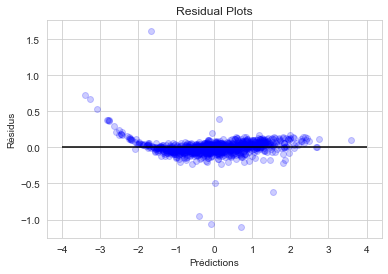

In [23]:
#Régression linéaire :
lin.scatter_residuals()

Les résidus de régression linéaire ont une certaine tendance quandratique, notamment pour les prédictions qui sont petites.

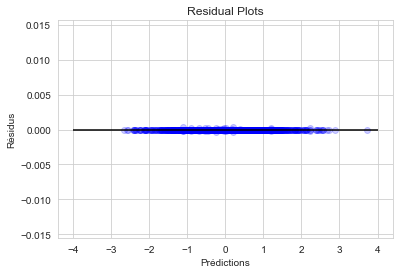

In [24]:
#Arbres de décision :
tree.scatter_residuals()

Le modèle d'arbres de décisions a une tendance à overfitter les données - toutes les erreus sont serrées autour de 0.

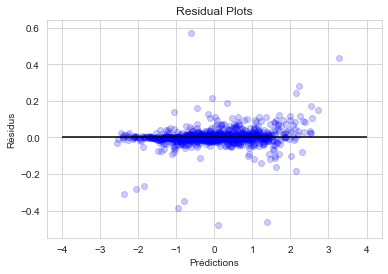

In [25]:
#Forêts aléatoires
forest.scatter_residuals()

Les erreus de forêts aléatoires sont correctement réparties d'une manière aléatoire autour de 0.

## 5.5 A Choix de modèles 

Pour choisir le modèle final, voici le résumé de RMSE moyen de validation croisée :

> Régression linéaire : RMSE = 0.1154 

> Arbre de décisions : RMSE = 0.2038

> Forêt aléatoire : RMSE = 0.1504


Pour la partie A du projet, nous avons décidé de choisir le modèle strictement par rapport au meilleur RMSE. Nous allons donc finaliser le modèle de régression linéaire avec toutes les features.

Dans la partie suivante (6), nous allons finaliser le modèle avec une régression Ridge, Lasso et Elastic Net. La régression Lasso nous permettra éventuellement éliminer les features qui ne sont pas pertinentes dans la modélisation.

# B - Modélisation de la consommation d'énergie

Dans un premier temps, nous allons préparer les données :

In [26]:
y_train_B = data['SiteEnergyUse(kBtu)_log']

In [27]:
y_train_B.shape

(1020,)

In [28]:
X_train_B = data.drop(['Unnamed: 0','SiteEnergyUse(kBtu)_log'], axis=1)

In [29]:
X_train_B.shape

(1020, 29)

## 5.1 B Entraîner plusieurs modèles

In [30]:
linB = Modelisation(X_train_B, y_train_B, 'lin')

Et obtenir le score RMSE :

In [31]:
linB.getRMSE()

Le modèle linéaire prédit les valeurs avec RMSE = 0.132


Ensuite nous allons entraîner l'objet pour modéliser l'arbre de décisions et également afficher son RMSE :

In [32]:
treeB = Modelisation(X_train_B, y_train_B, 'tree')

In [33]:
treeB.getRMSE()

Le modèle arbres de décisions prédit les valeurs avec RMSE = 0.0


L'erreur de zéro signifie que la modélisation avec les arbres de décision surapprend les données.

Finalement, nous allons tester le modèle de forêts aléatoires avec plusieurs nombres d'estimateurs : 

In [34]:
for i in range (10, 200, 10):
    
    forestB = Modelisation(X_train_B, y_train_B, 'forest', n_estimators=i)
    print("Pour n_estimators=", i)
    forestB.getRMSE()
  
    

Pour n_estimators= 10
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0768
Pour n_estimators= 20
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0679
Pour n_estimators= 30
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0647
Pour n_estimators= 40
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0622
Pour n_estimators= 50
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0602
Pour n_estimators= 60
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0604
Pour n_estimators= 70
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0598
Pour n_estimators= 80
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0592
Pour n_estimators= 90
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0578
Pour n_estimators= 100
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0575
Pour n_estimators= 110
Le modèle forêts aléatoires prédit les valeurs avec RMSE = 0.0568
Pour n_estimators= 120
Le modè

Nous pouvons voir que à partir de 110 estimateurs, le RMSE n'a plus de tendance de baisser. Nous allons donc utiliser 110 estimateurs qui nous paraît comme un bon compromis entre la qualité du modèle, le temps de calcul est overtfitting de données d'entraînement.

In [35]:
 forestB = Modelisation(X_train_B, y_train_B, 'forest', n_estimators=110)

## 5.2 B Validation croisée

Nous allons afficher les scores, la moyenne et l'écart-type d'une validation croisée de la régression linéaire en 5 folds :

In [36]:
linB.cross_valid(5)

Scores: [0.12136598 0.19991629 0.10778996 0.11207265 0.12864166]
Mean: 0.13395730614652537
Standard deviation: 0.0337670049886916


Les arbres de décision :

In [37]:
treeB.cross_valid(5)

Scores: [0.20661204 0.25537435 0.1974844  0.19111511 0.22630695]
Mean: 0.21537857247772169
Standard deviation: 0.023258806738719287


Les forêts aléatoires :

In [38]:
forestB.cross_valid(5)

Scores: [0.14225436 0.19607354 0.13172518 0.13111068 0.19130869]
Mean: 0.1584944904402008
Standard deviation: 0.029048812982003524


## 5.3 B Analyser variables les plus importantes

In [39]:
#Régression linéaire :
linB.features_importance()

[(1.117549815615942, 'TotalGHGEmissions_log'),
 (0.28938640582963354, 'RatioSourceSite_sup3'),
 (0.04500214080402421, 'CouncilDistrictCode_2'),
 (0.041664479280602, 'PrimaryPropertyType_Large Office'),
 (0.03179018908897263, 'CouncilDistrictCode_4'),
 (0.030690864973026373, 'CouncilDistrictCode_1'),
 (0.02182756036307274, 'CouncilDistrictCode_6'),
 (0.02140417673492997, 'PrimaryPropertyType_Retail Store'),
 (0.02118920638674571, 'PrimaryPropertyType_Mixed Use Property'),
 (0.01894349468457821, 'CouncilDistrictCode_5'),
 (0.017837003586173104, 'Parking'),
 (0.016739296209027196, 'PrimaryPropertyType_Small- and Mid-Sized Office'),
 (0.013680703831026418, 'ENERGYSTARCertified'),
 (0.011736698199357808, 'Age'),
 (0.005040970082128044, 'NumberofFloors_cat'),
 (0.003065036654236505, 'ThirdLPT'),
 (0.0021372039989422725, 'LargestPropertyUseTypeGFA_log'),
 (0.0006906386782254149, 'PropGFABuilding'),
 (-0.0018458352953860772, 'SecondLPT'),
 (-0.004953232510014373, 'PrimaryPropertyType_Other'),


In [40]:
#Arbres de décision :
treeB.features_importance()

[(0.8607545547207484, 'TotalGHGEmissions_log'),
 (0.07116278940674761, 'NaturalGas(kBtu)_pct'),
 (0.04705937131861566, 'RatioSourceSite_sup3'),
 (0.007255565273951463, 'SteamUse(kBtu)_pct'),
 (0.004652802585729908, 'LargestPropertyUseTypeGFA_log'),
 (0.004158438044387583, 'Age'),
 (0.000850200852291217, 'NaturalGas'),
 (0.0007653344084515886, 'PrimaryPropertyType_Retail Store'),
 (0.0007467825476501295, 'ENERGYSTARScore'),
 (0.0007026098517610186, 'NumberofFloors_cat'),
 (0.00044275079147163866, 'PrimaryPropertyType_Large Office'),
 (0.000228842762665466, 'SteamUse'),
 (0.0002242818272280387, 'PrimaryPropertyType_Small- and Mid-Sized Office'),
 (0.00016590287027317132, 'CouncilDistrictCode_6'),
 (0.00014333219126665372, 'ENERGYSTARCertified'),
 (0.00011554956265578386, 'ThirdLPT'),
 (0.00010678973894337334, 'Parking'),
 (8.961146317139031e-05, 'CouncilDistrictCode_3'),
 (6.741738448605311e-05, 'PropGFABuilding'),
 (6.457501061675564e-05, 'CouncilDistrictCode_4'),
 (6.173142363382479e-0

In [41]:
#Forêts aléatoires :
forestB.features_importance()

[(0.8407734146624298, 'TotalGHGEmissions_log'),
 (0.06996900781707427, 'NaturalGas(kBtu)_pct'),
 (0.03706518327717865, 'LargestPropertyUseTypeGFA_log'),
 (0.03377967826500783, 'RatioSourceSite_sup3'),
 (0.004905394837719029, 'SteamUse(kBtu)_pct'),
 (0.004212463760137445, 'Age'),
 (0.0035014268082541587, 'ENERGYSTARScore'),
 (0.0007979453499010428, 'SteamUse'),
 (0.0005566594933357293, 'NumberofFloors_cat'),
 (0.0005475073257668111, 'PropGFABuilding'),
 (0.0004994747560276178, 'PrimaryPropertyType_Retail Store'),
 (0.0004529693018516301, 'PrimaryPropertyType_Small- and Mid-Sized Office'),
 (0.00032892794397390384, 'PrimaryPropertyType_Large Office'),
 (0.00029098136758366294, 'SecondLPT'),
 (0.00028937527831472264, 'CouncilDistrictCode_3'),
 (0.0002761186171476886, 'NaturalGas'),
 (0.0002475856774483415, 'PrimaryPropertyType_Other'),
 (0.00022357405264425713, 'CouncilDistrictCode_4'),
 (0.00022026285481852717, 'CouncilDistrictCode_2'),
 (0.0001748397589140052, 'PrimaryPropertyType_Mixed

## 5.4 B Analyser l'erreur pour chaque modèle

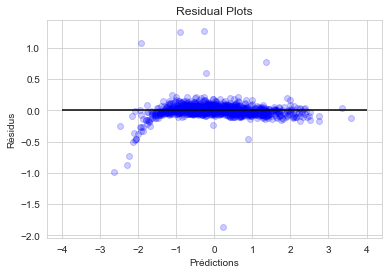

In [42]:
#Régression linéaire :
linB.scatter_residuals()

Les résidus de régression linéaire ont une certaine tendance quandratique, notamment pour les prédictions qui sont petites.

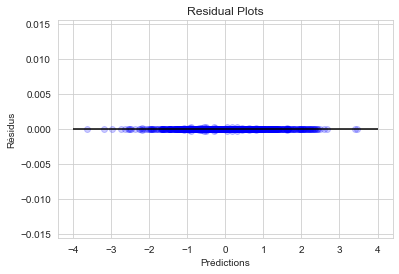

In [43]:
#Arbres de décision :
treeB.scatter_residuals()

Le modèle d'arbres de décisions a une tendance à overfitter les données - toutes les erreus sont serrées autour de 0.

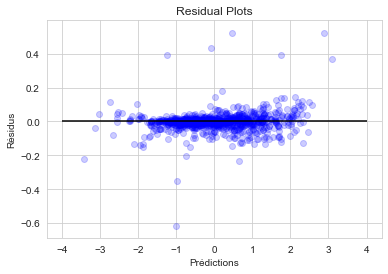

In [44]:
#Forêts aléatoires
forestB.scatter_residuals()

Les résidus de forêt aléatoire sont répartis d'une façon aléatoire autour de zéro.

## 5.5 B Choix de modèles

Pour choisir le modèle final, voici le résumé de RMSE moyen de validation croisée :

> Régression linéaire : RMSE = 0.1340

> Arbre de décisions : RMSE = 0.2154

> Forêt aléatoire : RMSE = 0.1585


Le score RMSE de la régression linéaire est le meilleur des trois modèles, mais il est seulement légèrement inférieur que celui de forêt aléatoire. Pour des raisons pédagogiques, nous allons donc opter pour le modèle de forêts aléatoire dans cette partie du projet.

# 6 Finaliser les modèles

# A - Modélisation d'émissions de CO2 avec régression linéaire 

## 6.1 A Ajustement de paramètres avec validation croisée

Dans le chapître 5.5 A, nous avons choisi le modèle à finaliser. Il s'agit d'une régression linéaire, avec toutes les features de base (29 features).

Les données d'entraînement :

X_train_A
y_train_A

Nous allons faire un choix de modèle final à l'aide de modules de sci-kit learn qui intégrent la validation croisée. Les modèles que nous allons tester sont les suivants :

1. Régression linéaire Ridge
2. Régression linéaire Lasso
3. Régression linéaire ElasticNet

La taille de notre jeu de données d'entraîenement est plutôt faible (1020 observations dans jeu de données d'entraînement), nous allons faire la validation croisée en 5 folds.

Pour tous les modèles, nous allons tester les paramètres alpha proposés par défaut par l'algorithmes.

Nous allons utiliser la fonction suivante qui nous permets de créer une liste qui contient MSE, RMSE et R2 pour chaque modèle :

In [45]:
def testing_models(model, X, y):
    
    """Fonction qui prend comme argument un modèle et renvoi une liste de scores : MSE, RMSE, et R2
    
    Arguments :
    - model: définition d'un des modèles de sci-kit learn, exemple : RidgeCV
    - X: matrice de features
    - y: cible
    
    Sortie :
    
    - Une liste contenant le score MSE, RMSE et R2 
    
    """
    
    mod = model
    mod.fit(X, y)
    pred = mod.predict(X)
    mse = round(mean_squared_error(y, pred), 5)
    rmse = round(np.sqrt(mse), 5)
    R2 = round(mod.score(X, y), 5)
    scores=list([mse, rmse, R2])
    return scores
    

In [163]:
#Régression Ridge
from sklearn.linear_model import RidgeCV
rl_ridge = testing_models(RidgeCV(cv=5), X_train_A, y_train_A)

In [164]:
#Régression Lasso
from sklearn.linear_model import LassoCV
rl_lasso = testing_models(LassoCV(cv=5, random_state=42), X_train_A, y_train_A)

In [165]:
#ElasticNet
from sklearn.linear_model import ElasticNetCV
rl_ElasticNet = testing_models(ElasticNetCV(cv=5, random_state=42), X_train_A, y_train_A)

In [166]:
scores=DataFrame([rl_ridge, rl_lasso, rl_ElasticNet],
                 index=['Régression Ridge', 'Régression Lasso', 'Régression ElasticNet'],
                 columns=['MSE', 'RMSE', 'R2'])

In [167]:
scores

,MSE,RMSE,R2
Régression Ridge,0.01300,0.11402,0.98700
Régression Lasso,0.01319,0.11485,0.98681
Régression ElasticNet,0.01319,0.11485,0.98681


Nous pouvons voir que le modèle de régression polynomiale Ridge de degré 2 a les meilleures performances.

In [169]:
#Pour visualiser les résidus :
mod = RidgeCV(cv=5)
mod.fit(X_train_A, y_train_A)
pred = mod.predict(X_train_A)

Text(0, 0.5, 'Résidus')

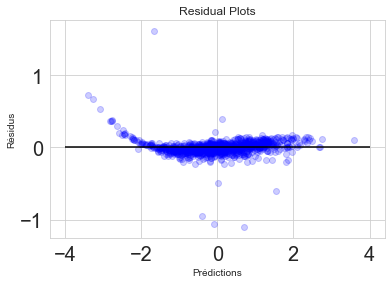

In [170]:
train = plt.scatter(pred,(y_train_A-pred),c='b',alpha=0.2)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-4,xmax=4)

#Labels
plt.title('Residual Plots')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')

## 6.2 A Utiliser les méthodes ensemblistes

Nous allons utiliser une méthode appelée "bagging". Bagging consiste à entraîner notre modèle plusieurs fois sur des échantillons tirés de notre jeu de donné avec remise. A la fin, nous allons générer le modèle final par aggrégation des modèles issues d'échantillonage. Cette technique permets de réduire et les biais et la variance du modèle final.

Le code suivant nous permet d'entraîner 500 modèles de régression polynomiale Ridge. Chaque modèle est entaîné sur un jeu de donénes contenant 100 observations tirés avec remplacement.

Nous allons calculer le score Out-of-bag. Il s'agit de score de précision qui est calculé sur les données qui ne sont pas tirés pour rentrer dans le modèle. Il nous servent donc comme données "test". Etant donné que en moyen seulement à peu près 63 % d'invidus soient tiré pour construire le modèle, le score OOB est calculé sur environ 37% d'individus.

In [171]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(
    RidgeCV(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag.fit(X_train_A, y_train_A)
bag.oob_score_

0.9858252392019878

Selon le score Out-of-bag, le modèle va probablement prédire les données test avec une précision de 98.58 %.

Nous allons également essayer d'évaluer les modèles en tirant aléatoirement les features qui vont servir pour les calculs.  

In [172]:
bag = BaggingRegressor(
    RidgeCV(), n_estimators=500,
    max_samples=100, bootstrap=True, bootstrap_features=True, n_jobs=-1, oob_score=True)
bag.fit(X_train_A, y_train_A)
bag.oob_score_

0.9466107524830659

Nous avons encore réussi à améliorer le score OOB en ajoutant bootstrap de features. Le OOB est maintenant 94.66% ce qui signifie que les prédiction sur les données test seront fait avec une précision d'environ 95%. 

## 6.3 A Mesurer les performances de modèle final 

### 6.3.1 A Préparation de données test pour les analyses

In [60]:
data_test_load = pd.read_csv('Data/data_test.csv',delimiter='\t',encoding='utf-8', low_memory=False)

In [61]:
data_test=data_test_load.copy()

In [62]:
data_test.drop(['Unnamed: 0'], inplace=True, axis=1)

Imputer les NaN :

In [63]:
#Test
data_test.fillna({'ListOfAllPropertyUseTypes':'None',
             'LargestPropertyUseType':'Other',
                 'SecondLargestPropertyUseType':'None', 
                 'SecondLargestPropertyUseTypeGFA':0,
                 'ThirdLargestPropertyUseType':'None',
                 'ThirdLargestPropertyUseTypeGFA':0,
                 'YearsENERGYSTARCertified': 'None',
                 'Comments':'None',
                 'Outlier': 'None',
                }, inplace=True)

Séparer les données num et cat :

In [64]:
data_test_cat=data_test[['PrimaryPropertyType',
           'CouncilDistrictCode', 
           'Neighborhood', 
           'ListOfAllPropertyUseTypes',
           'SecondLargestPropertyUseType',
           'ThirdLargestPropertyUseType', 
           'YearsENERGYSTARCertified']]

In [65]:
#Test
data_test_num = data_test[['Latitude', 
                 'Longitude', 
                 'YearBuilt', 
                 'NumberofBuildings',
                 'NumberofFloors', 
                 'PropertyGFATotal', 
                 'PropertyGFAParking',
                 'PropertyGFABuilding(s)', 
                 'LargestPropertyUseTypeGFA',
                 'SecondLargestPropertyUseTypeGFA',
                 'ThirdLargestPropertyUseTypeGFA',
                 'ENERGYSTARScore', 
                 'SiteEnergyUse(kBtu)', 
                 'SteamUse(kBtu)',
                 'Electricity(kBtu)', 
                 'NaturalGas(kBtu)',  
                 'TotalGHGEmissions',
                 'SourceEUI(kBtu/sf)',
                 'SiteEUI(kBtu/sf)']]

Utiliser la même imputation comme pour les data train :

In [66]:
import joblib

In [67]:
imputer = joblib.load("imputer.pkl")

In [68]:
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [69]:
#Test
imputer.fit(data_test_num)

#Test
X_test = imputer.transform(data_test_num)

#Test
data_test_tr = pd.DataFrame(X_test, columns=data_test_num.columns, index=data_test.index)

In [70]:
def calcul_proportion(data, var1, var2, var3):
    """Fonction qui calcule une proportion de 3 variables en % :
    
    Entrées :
        data : DataFrame
        var1 : variable numérique - numérateur
        var2, var 3 : variables numériques qui servirons pour dénominateur en somme avec var1
        
    Sortie :
        data : DataFrame avec la variable recodée    
    """
    data['temp']=round(data[var1]*100/(data[var1]+data[var2]+data[var3]),2)
    
    nom = var1 +'_pct' 
    
    data.rename(columns = {'temp':nom}, inplace = True)
       
    return data

In [71]:
data_test_tr = calcul_proportion(data_test_tr, 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)')
data_test_tr = calcul_proportion(data_test_tr, 'NaturalGas(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)')

In [72]:
def transf_binaire(data, cond, nom):
    """Fonction pour transformer les variables en variables binaires.
    
    Entrées :
        data : DataFrame qui contient la variable d'origine (ex. données quanti)
        cond : condition (si vrai, variable binaire = 1)
        nom : nom de la nouvelle variable
    
    Sortie :
        data : DataFrame avec la variable recodée nommée avec sufix _bin
    """
       
    data[nom]=np.where(cond, 1, 0)
       
    return data 

In [73]:
data_test_tr=transf_binaire(data_test_tr, data_test_tr['SteamUse(kBtu)']!=0, 'SteamUse')
data_test_tr=transf_binaire(data_test_tr, data_test_tr['NaturalGas(kBtu)']!=0, 'NaturalGas')

In [74]:
def transf_binaire_multiclass(data, var):
    """Fonction pour recoder des variables multiclasse en une variable binaire par classe - 1 (sauf la dernière) :
    
    Entrées:
        data : DataFrame
        var : variable à recoder
    
    Sortie : 
        data : DataFrame qui contient les variables crées    
    """
    liste = data[var].value_counts().index
    liste_srt = liste.sort_values()
    
    for classe in liste_srt[:-1]:
        data['temp']=np.where(data[var]==classe,1,0)
        name = var + '_' + str(classe)
        data.rename(columns = {'temp':name}, inplace = True)
    return data

In [75]:
data_test_cat=transf_binaire_multiclass(data_test_cat, 'CouncilDistrictCode')

In [76]:
def rec_classe_other(data, liste, var, rec):
    """Fonction qui va regroupper les classes d'une variable quanlitative qui ne se trouvent pas dans une liste :
    
    Entrées :
    data : DataFrame
    liste : une liste de classes à garder
    var : variable concernée entre ''
    rec : une chaîne de caractères qui indique la nouvelle valeur de classes recodées entre ''
    
    Sortie :
    data : DataFrame avec la variables recodée    
    """
    
    data[var] = np.where(data[var].isin(liste), data[var], rec)
    
    return data

In [77]:
list_cat=['Other', 'Small- and Mid-Sized Office', 'Warehouse', 'Large Office',
       'Mixed Use Property', 'Retail Store', 'Hotel', 'Worship Facility']

In [78]:
data_test_cat = rec_classe_other(data_test_cat, list_cat, 'PrimaryPropertyType', 'Other')

In [79]:
data_test_cat=transf_binaire_multiclass(data_test_cat, 'PrimaryPropertyType')

In [80]:
#Variable NumberofBuildings
data_test_tr=transf_binaire(data_test_tr, data_test_tr['NumberofBuildings']==1, 'OneBuilding')

#Variable SecondLargestPropretyUseType
data_test_cat=transf_binaire(data_test_cat, data_test_cat['SecondLargestPropertyUseType']!='None', 'SecondLPT')

#Variable ThirdLargestPropretyUseType
data_test_cat=transf_binaire(data_test_cat, data_test_cat['ThirdLargestPropertyUseType']!='None', 'ThirdLPT')

#Variable YearsENERGYSTARCertified
data_test_cat=transf_binaire(data_test_cat, data_test_cat['YearsENERGYSTARCertified']!='None', 'ENERGYSTARCertified')

#Variable PropertyGFAParking
data_test_tr=transf_binaire(data_test_tr, data_test_tr['PropertyGFAParking']!=0, 'Parking')

#Variable NumberofFloors
data_test_cat["NumberofFloors_cat"] = pd.cut(data_test_tr["NumberofFloors"], bins=[-1, 1, 4, 10, np.inf], labels=[1, 2, 3, 4])

In [81]:
def transf_log(data, var):
    """Fonction qui transforme les variables numériques en log :
    
    Entrées :
        data : DataFrame
        var : variable numérique à transformer
        
    Sortie :
        data : DataFrame avec les variables transformées    
    """
    data['temp'] = (data[var]+1).apply(np.log)
    
    nom = var +'_log' 
    
    data.rename(columns = {'temp':nom}, inplace = True)
    
    return data  

In [82]:
data_test_tr=transf_log(data_test_tr, 'TotalGHGEmissions')
data_test_tr=transf_log(data_test_tr, 'LargestPropertyUseTypeGFA')
data_test_tr=transf_log(data_test_tr, 'SiteEnergyUse(kBtu)')

In [83]:
data_test_tr['Age'] = 2019 - data_test_tr['YearBuilt']

In [84]:
#Test
data_test_tr['RatioSourceSite']=round(data_test_tr['SourceEUI(kBtu/sf)']/data_test_tr['SiteEUI(kBtu/sf)'], 2)

In [85]:
#Test
data_test_cat['RatioSourceSite_sup3']=np.where(data_test_tr['RatioSourceSite']>3, 1, 0)

In [86]:
#Test
data_test_tr['PropGFABuilding']=data_test_tr['PropertyGFABuilding(s)']/data_test_tr['PropertyGFATotal']

In [87]:
data_test_std=data_test_tr[['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log', 'Age', 'PropGFABuilding', 'ENERGYSTARScore', 
                 'SteamUse(kBtu)_pct', 'NaturalGas(kBtu)_pct','LargestPropertyUseTypeGFA_log', 'RatioSourceSite']]

In [88]:
data_test_tr.drop(['TotalGHGEmissions_log', 'SiteEnergyUse(kBtu)_log', 'Age', 'PropGFABuilding', 'ENERGYSTARScore', 
                 'SteamUse(kBtu)_pct', 'NaturalGas(kBtu)_pct','LargestPropertyUseTypeGFA_log', 'RatioSourceSite'], 
            axis=1, inplace=True)

In [89]:
std_scale = joblib.load("std_scale.pkl")

In [90]:
#Test
data_test_tr_std =std_scale.transform(data_test_std)

data_test_tr_std= DataFrame(data_test_tr_std, columns=data_test_std.columns, index=data_test_std.index)

In [91]:
data_test_clean = pd.concat([data_test_tr_std, data_test_cat], axis=1)

In [92]:
data_test_clean = pd.concat([data_test_clean, data_test_tr], axis=1)

In [93]:
data_test_clean=data_test_clean.dropna()

In [94]:
data_test_clean.drop(['PrimaryPropertyType', 'CouncilDistrictCode','Neighborhood','ListOfAllPropertyUseTypes',
                'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                'YearsENERGYSTARCertified','Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
                'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
                'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
                'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
                'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
                'NaturalGas(kBtu)', 'TotalGHGEmissions', 'SourceEUI(kBtu/sf)',
                'SiteEUI(kBtu/sf)', 'RatioSourceSite'],axis=1, inplace=True)

In [95]:
y_test_A = data_test_clean['TotalGHGEmissions_log']

In [96]:
X_test_A = data_test_clean.drop(['TotalGHGEmissions_log'], axis=1)

### 6.3.2 A Evaluation de modèle

In [173]:
#Modèle final :
rp_ridge = RidgeCV(cv=5)
rp_ridge.fit(X_train_A, y_train_A)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [174]:
final_pred_A = rp_ridge.predict(X_test_A)

In [175]:
final_mse_A = round(mean_squared_error(y_test_A, final_pred_A), 5)
final_rmse_A = round(np.sqrt(final_mse_A), 5)
final_R2_A = round(rp_ridge.score(X_test_A, y_test_A),5)

In [176]:
final_mse_A

0.00868

In [177]:
final_rmse_A

0.09317

In [178]:
final_R2_A

0.99205

In [104]:
#Bagging :

In [179]:
bag = BaggingRegressor(
    RidgeCV(), n_estimators=500,
    max_samples=100, bootstrap=True, bootstrap_features=True, n_jobs=-1, oob_score=True)
bag.fit(X_train_A, y_train_A)

BaggingRegressor(base_estimator=RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
                                        cv=None, fit_intercept=True,
                                        gcv_mode=None, normalize=False,
                                        scoring=None, store_cv_values=False),
                 bootstrap=True, bootstrap_features=True, max_features=1.0,
                 max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                 random_state=None, verbose=0, warm_start=False)

In [180]:
bag_pred_A = bag.predict(X_train_A)

In [181]:
bag_pred_final_A = bag.predict(X_test_A)
bag_mse_A = round(mean_squared_error(y_test_A, bag_pred_final_A), 5)
bag_rmse_A = round(np.sqrt(bag_mse_A), 5)
bag_R2_A = round(bag.score(X_test_A, y_test_A),5)

In [182]:
bag_mse_A

0.05076

In [183]:
bag_rmse_A 

0.2253

In [184]:
bag_R2_A 

0.95352

Le script suivant permets de visualiser les résidus de modèle final :

Text(0.5, 1.0, 'Residual Plots')

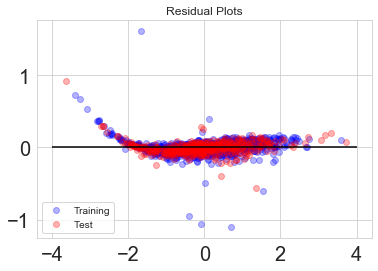

In [185]:
#Pour visualiser les erreurs de modèle test et train :

# Scatter plot the training data
train = plt.scatter(pred,(y_train_A-pred),c='b',alpha=0.3)

# Scatter plot the testing data
test = plt.scatter(final_pred_A,(y_test_A-final_pred_A),c='r',alpha=0.3)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-4,xmax=4)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

Le script suivant permets de visualiser les résidus de modèle final avec bagging :

Text(0.5, 1.0, 'Residual Plots - with bagging method')

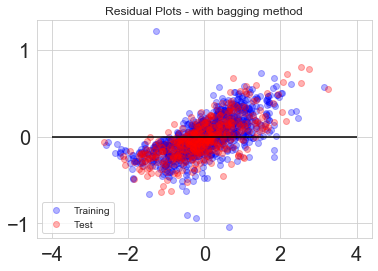

In [186]:
#Pour visualiser les erreurs de modèle test et train :

# Scatter plot the training data
train = plt.scatter(bag_pred_A,(y_train_A-bag_pred_A),c='b',alpha=0.3)

# Scatter plot the testing data
test = plt.scatter(bag_pred_final_A,(y_test_A-bag_pred_final_A),c='r',alpha=0.3)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-4,xmax=4)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots - with bagging method')

### 6.3.3 A Prédictions en fonctions de type d'immeuble

In [189]:
def testing_property_type(property_type, X, y, test):
    
    """Focntion qui prend en compte le type d'immeuble, les données d'entraînement et les données test et qui retourne 
    MSE, RMSE et R2 en fonction de type de bâtiment
    
    Entrées :

    Property_type : Le nom de type d'immeuble
    X : DataFrame de features n'entraînement
    y : Vecteur de la cible d'entraînement
    test : DataFrame de données test
    
    Sortie :
    
    List de scores MSE, RMSE et R2   
    
    """
    
    
    test_ppt = test[test[property_type]==1]
    y_test_ppt = test_ppt['TotalGHGEmissions_log']
    X_test = test_ppt.drop(['TotalGHGEmissions_log'], axis=1)
    
    
    mod = RidgeCV(cv=5)
    mod.fit(X, y)
    pred_final = mod.predict(X_test)
    mse = round(mean_squared_error(y_test_ppt, pred_final), 5)
    rmse = round(np.sqrt(mse), 5)
    R2 = round(mod.score(X_test, y_test_ppt), 5)
    scores=list([mse, rmse, R2])
    return scores

In [190]:
hotel=testing_property_type('PrimaryPropertyType_Hotel', X_train_A, y_train_A, data_test_clean)
large_office=testing_property_type('PrimaryPropertyType_Large Office', X_train_A, y_train_A, data_test_clean)
mixed_use=testing_property_type('PrimaryPropertyType_Mixed Use Property', X_train_A, y_train_A, data_test_clean)
other=testing_property_type('PrimaryPropertyType_Other', X_train_A, y_train_A, data_test_clean)
retail_store=testing_property_type('PrimaryPropertyType_Retail Store', X_train_A, y_train_A, data_test_clean)
small_office=testing_property_type('PrimaryPropertyType_Small- and Mid-Sized Office', X_train_A, y_train_A, data_test_clean)
warehouse=testing_property_type('PrimaryPropertyType_Warehouse', X_train_A, y_train_A, data_test_clean)


In [191]:
scores_ppt=DataFrame([large_office, small_office, retail_store, warehouse, mixed_use, hotel, other],
                 index=['Grand bureau', 'Petit et moyen bureau', 'Magasin de détails', 'Entrepôt', 'Utilisation mixte',
                       'Hôtel', 'Autre'],
                 columns=['MSE', 'RMSE', 'R2'])

In [192]:
scores_ppt

,MSE,RMSE,R2
Grand bureau,0.00763,0.08735,0.97922
Petit et moyen bureau,0.00715,0.08456,0.98307
Magasin de détails,0.01025,0.10124,0.98544
Entrepôt,0.00472,0.06870,0.99374
Utilisation mixte,0.00274,0.05235,0.99709
Hôtel,0.00130,0.03606,0.99872
Autre,0.01413,0.11887,0.98982


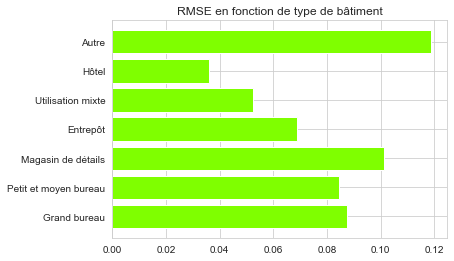

In [207]:
plt.title("RMSE en fonction de type de bâtiment")
plt.barh(range(scores_ppt.shape[0]), scores_ppt['RMSE'], color='chartreuse')
plt.yticks(range(scores_ppt.shape[0]), scores_ppt.index)

label_size = 7
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 

# B - Modélisation de la consommation d'énergie avec forêts aléatoires 

## 6.1 B Ajustement de paramètres avec une recherche sur grille

Nous allons utiliser la méthode de recherche sur grille (grid validation) afin de trouver les meilleurs paramètres de forêts aléatoires qui seront utilisées pour prédire la consommation d'énérgie de batîments.

Le modul GridSearchCV va construire toutes les combinaisons de forêts avec 20, 30, 40, 50, 100 et 150 arbres et 20, 25 ou 29 features. Ceci sera fait en utilisant bootstrap (tirage avec remise) ou non.

### 6.1.1 B Modèle avec sélection de variables (27 features) 

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [20, 30, 40, 50, 100, 150], 'max_features': [20,25,29]},
    {'bootstrap': [False], 'n_estimators': [20, 30, 40, 50, 100, 150], 'max_features': [20, 25, 29]},
  ]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_B, y_train_B)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [20, 25, 29],
  

In [119]:
grid_search.best_params_

{'max_features': 29, 'n_estimators': 100}

In [120]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.17915059973642392 {'max_features': 20, 'n_estimators': 20}
0.17616830082868856 {'max_features': 20, 'n_estimators': 30}
0.17373420793460892 {'max_features': 20, 'n_estimators': 40}
0.17395300417136314 {'max_features': 20, 'n_estimators': 50}
0.17159533418781428 {'max_features': 20, 'n_estimators': 100}
0.17193129547866712 {'max_features': 20, 'n_estimators': 150}
0.17482494404651852 {'max_features': 25, 'n_estimators': 20}
0.1695904627479634 {'max_features': 25, 'n_estimators': 30}
0.16776116601201563 {'max_features': 25, 'n_estimators': 40}
0.16776473437805825 {'max_features': 25, 'n_estimators': 50}
0.16401199654203955 {'max_features': 25, 'n_estimators': 100}
0.16437757822490942 {'max_features': 25, 'n_estimators': 150}
0.1700268036344316 {'max_features': 29, 'n_estimators': 20}
0.16616373393388137 {'max_features': 29, 'n_estimators': 30}
0.16449090788422904 {'max_features': 29, 'n_estimators': 40}
0.1634495287452551 {'max_features': 29, 'n_estimators': 50}
0.1612015031921842 {'ma

Nous pouvons voir que l'utilisation de bootstrap donne globalement meilleurs résultats. Nous allons refaire une recherche sur grille en augmentant le nombre d'arbres et en ajoutant plusieurs options pour le nombre de features qui rentrent dans le modèle, cette fois-ci uniquement en utilisant le bootstrap.

In [121]:
param_grid = [
    {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,  100, 125,  150, 175, 200], 
     'max_features': [5, 10, 15, 20, 25, 29]} ]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_B, y_train_B)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [5, 10, 15, 20, 

Le listing suivant représente le score en fonction de combinaison de paramètres du modèle :

In [122]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.38264766689131097 {'max_features': 5, 'n_estimators': 10}
0.3482833140117484 {'max_features': 5, 'n_estimators': 20}
0.34589608386311366 {'max_features': 5, 'n_estimators': 30}
0.32945249874269794 {'max_features': 5, 'n_estimators': 40}
0.32474445290568965 {'max_features': 5, 'n_estimators': 50}
0.32411630143792497 {'max_features': 5, 'n_estimators': 60}
0.32087026814929454 {'max_features': 5, 'n_estimators': 70}
0.3184454463987529 {'max_features': 5, 'n_estimators': 80}
0.31900360653114224 {'max_features': 5, 'n_estimators': 90}
0.32068053972058586 {'max_features': 5, 'n_estimators': 100}
0.3188063876373383 {'max_features': 5, 'n_estimators': 125}
0.3207587766438851 {'max_features': 5, 'n_estimators': 150}
0.3183072187703972 {'max_features': 5, 'n_estimators': 175}
0.3192445562630288 {'max_features': 5, 'n_estimators': 200}
0.24811894513264424 {'max_features': 10, 'n_estimators': 10}
0.2366306209131178 {'max_features': 10, 'n_estimators': 20}
0.2384399458807152 {'max_features': 10, 

Nous allons représenter les scores à l'aide de heatmaps :

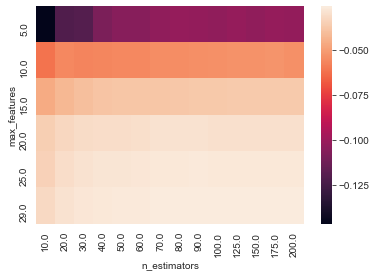

In [123]:
mean_test_score=grid_search.cv_results_["mean_test_score"]
max_features = 14*[5, 10, 15, 20, 25, 29]
max_features.sort()
n_estimators = 6*[10, 20, 30, 40, 50, 60, 70, 80, 90,  100, 125,  150, 175, 200]
grid_map = DataFrame([max_features,n_estimators,mean_test_score]).T
grid_map.rename(columns={0:'max_features', 1:'n_estimators', 2:'Mean_test_score'}, inplace=True)
grid_map = grid_map.pivot('max_features', 'n_estimators', 'Mean_test_score')
sns.heatmap(grid_map)

Nous pouvons voir que les meilleures scores sont obtenus à partir de 20 features qui rentrent dans le modèle. 

L'option suivante affiche directement la meilleure combinaison de paramètres : 

In [124]:
grid_search.best_params_

{'max_features': 29, 'n_estimators': 200}

Créer le modèle avec les meilleures paramètres trouvés :

In [125]:
forest_final = RandomForestRegressor(max_features=29, n_estimators=200, random_state=42)

In [126]:
forest_final.fit(X_train_B, y_train_B)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=29, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [127]:
pred_B = forest_final.predict(X_train_B)
mse_B = round(mean_squared_error(y_train_B, pred_B), 5)
rmse_B = round(np.sqrt(mse_B), 5)
R2_B = round(forest_final.score(X_train_B, y_train_B),5)

In [128]:
mse_B

0.00321

In [129]:
rmse_B

0.05666

In [130]:
R2_B

0.99679

Le modèle avec 29 features et 200 arbres est le plus performant avec le RMSE de 0.0567 et coefficient de détermination R2 = 0.9970.

## 6.2 B Evaluation de modèle final

### 6.3.1 B Préparation de données

In [133]:
y_test_B = data_test_clean['SiteEnergyUse(kBtu)_log']

In [134]:
X_test_B = data_test_clean.drop(['SiteEnergyUse(kBtu)_log'], axis=1)

### 6.3.2 B Evaluation de modèle

In [135]:
forest_final = RandomForestRegressor(max_features=29, n_estimators=200, random_state=42)
forest_final.fit(X_train_B, y_train_B)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=29, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [136]:
pred_final_B = forest_final.predict(X_test_B)
mse_final_B = round(mean_squared_error(y_test_B, pred_final_B), 5)
rmse_final_B = round(np.sqrt(mse_final_B), 5)
R2_final_B = round(forest_final.score(X_test_B, y_test_B),5)

In [137]:
mse_final_B

0.01805

In [138]:
rmse_final_B

0.13435

In [139]:
R2_final_B

0.98233

Le score RMSE du modèle final est 0.13435 et le coefficient de détermination 98.233 %. Le modèle prédit bien les la consommation de batîments.

Le script suivant permets de visualiser les résidus de modèle final :

Text(0.5, 1.0, 'Residual Plots')

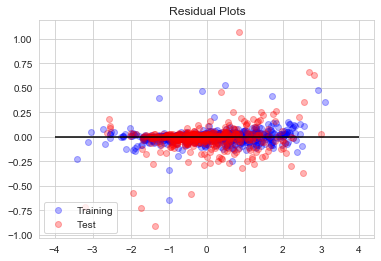

In [144]:
#Pour visualiser les erreurs de modèle test et train :

# Scatter plot the training data
train = plt.scatter(pred_B,(y_train_B-pred_B),c='b',alpha=0.3)

# Scatter plot the testing data
test = plt.scatter(pred_final_B,(y_test_B-pred_final_B),c='r',alpha=0.3)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-4,xmax=4)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

### 6.3.3 B Prédiction en fonction de type d'immeuble

In [146]:
def testing_property_typeB(property_type, X, y, test):
    
    """Focntion qui prend en compte le type d'immeuble, les données d'entraînement et les données test et qui retourne 
    MSE, RMSE et R2 en fonction de type de bâtiment
    
    Entrées :

    Property_type : Le nom de type d'immeuble
    X : DataFrame de features n'entraînement
    y : Vecteur de la cible d'entraînement
    test : DataFrame de données test
    
    Sortie :
    
    List de scores MSE, RMSE et R2   
    
    """
    test_ppt = test[test[property_type]==1]
    y_test_ppt = test_ppt['SiteEnergyUse(kBtu)_log']
    X_test = test_ppt.drop(['SiteEnergyUse(kBtu)_log'], axis=1)
    
    mod = RandomForestRegressor(max_features=29, n_estimators=200, random_state=42)
    mod.fit(X, y)
      
    pred_final = mod.predict(X_test)
    mse = round(mean_squared_error(y_test_ppt, pred_final), 5)
    rmse = round(np.sqrt(mse), 5)
    R2 = round(mod.score(X_test, y_test_ppt), 5)
    scores=list([mse, rmse, R2])
    return scores

In [147]:
hotel=testing_property_typeB('PrimaryPropertyType_Hotel', X_train_B, y_train_B, data_test_clean)
large_office=testing_property_typeB('PrimaryPropertyType_Large Office', X_train_B, y_train_B, data_test_clean)
mixed_use=testing_property_typeB('PrimaryPropertyType_Mixed Use Property', X_train_B, y_train_B, data_test_clean)
other=testing_property_typeB('PrimaryPropertyType_Other', X_train_B, y_train_B, data_test_clean)
retail_store=testing_property_typeB('PrimaryPropertyType_Retail Store', X_train_B, y_train_B, data_test_clean)
small_office=testing_property_typeB('PrimaryPropertyType_Small- and Mid-Sized Office', X_train_B, y_train_B, data_test_clean)
warehouse=testing_property_typeB('PrimaryPropertyType_Warehouse', X_train_B, y_train_B, data_test_clean)


In [148]:
scores_pptB=DataFrame([large_office, small_office, retail_store, warehouse, mixed_use, hotel, other],
                 index=['Grand bureau', 'Petit et moyen bureau', 'Magasin de détails', 'Entrepôt', 'Utilisation mixte',
                       'Hôtel', 'Autre'],
                 columns=['MSE', 'RMSE', 'R2'])

In [149]:
scores_pptB

,MSE,RMSE,R2
Grand bureau,0.01304,0.11419,0.95653
Petit et moyen bureau,0.01601,0.12653,0.94867
Magasin de détails,0.05686,0.23845,0.91553
Entrepôt,0.01355,0.11640,0.97361
Utilisation mixte,0.00503,0.07092,0.99338
Hôtel,0.01298,0.11393,0.98011
Autre,0.02326,0.15251,0.98283


([<matplotlib.axis.YTick at 0x1f0ab320>,
 <a list of 7 Text yticklabel objects>)

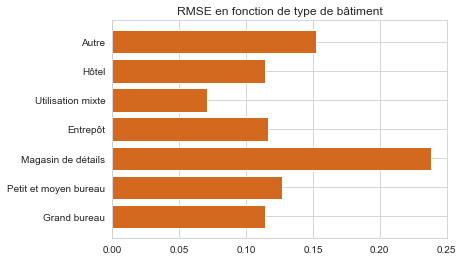

In [150]:
plt.title("RMSE en fonction de type de bâtiment")
plt.barh(range(scores_pptB.shape[0]), scores_pptB['RMSE'], color='chocolate')
plt.yticks(range(scores_pptB.shape[0]), scores_pptB.index)

# 7 Evaluer l'intérêt d'ENERGY STAR Score 

## 7.1 Représentation graphique 

Dans un premier temps, nous allons voir comment la variable ENERGYSTAR Score est correlée avec Les émissions de CO2 :

In [151]:
lin_reg= LinearRegression()

Text(0.5, 1.0, "Emissions de CO2 en fonction d'ENERGY STAR Score")

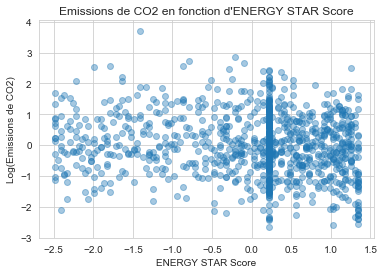

In [152]:
plt.scatter(X_train_A['ENERGYSTARScore'], y_train_A, alpha=0.4)

plt.ylabel('Log(Emissions de CO2)')
plt.xlabel('ENERGY STAR Score')
plt.title("Emissions de CO2 en fonction d'ENERGY STAR Score")

La représentation graphique la transformation logarithmique d'émissions de CO2 et ENERGY STAR Score ne montre pas de lien entre les deux variables. 

## 7.2 Evaluation de l'importance du feature avec forêts aléatoires

Nous allons évaluer l'importance de feature ENERGY STAR Score sur la prédiction d'émissions à l'aide de modèle de forêts aléatoires. Tout d'abord, nous allons chercher les hyperparamètres du modèle avec grid evaluation comme pour la prédiction de consommation d'énérgie : 

In [153]:
param_grid = [
    {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,  100, 125,  150, 175, 200], 'max_features': [5, 10, 15, 20, 25, 29]} ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train_A, y_train_A)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [5, 10, 15, 20

In [154]:
grid_search.best_params_

{'max_features': 25, 'n_estimators': 200}

In [155]:
forest_A = RandomForestRegressor(max_features=20, n_estimators=20, random_state=42)
forest_A.fit(X_train_A, y_train_A)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=20, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Nous allons vérifier la performance du modèle avec son RMSE :

In [156]:
pred_forest_A = forest_A.predict(X_test_A)
mse_forest_A = round(mean_squared_error(y_test_A, pred_forest_A), 5)
rmse_forest_A = round(np.sqrt(mse_forest_A), 5)

In [157]:
rmse_forest_A

0.1226

Le modèle prédit les données test avec RMSE de 0.1226

Et finalement nous allons afficher les importances de features :

In [158]:
sorted(zip(forest_A.feature_importances_, X_train_A.columns), reverse=True)

[(0.672996560698921, 'SiteEnergyUse(kBtu)_log'),
 (0.10784340338780601, 'RatioSourceSite_sup3'),
 (0.09151113649571363, 'NaturalGas(kBtu)_pct'),
 (0.07211511168226664, 'LargestPropertyUseTypeGFA_log'),
 (0.011404766924942916, 'NumberofFloors_cat'),
 (0.010922894908352071, 'SteamUse(kBtu)_pct'),
 (0.008236320224683126, 'NaturalGas'),
 (0.0071679749280832, 'ENERGYSTARScore'),
 (0.005320722953696662, 'SteamUse'),
 (0.003570023098184802, 'Age'),
 (0.0012145001595101484, 'PrimaryPropertyType_Large Office'),
 (0.001041601355863839, 'PrimaryPropertyType_Warehouse'),
 (0.0008390668661684511, 'PrimaryPropertyType_Small- and Mid-Sized Office'),
 (0.0008014925674670105, 'PropGFABuilding'),
 (0.0007497119404037172, 'OneBuilding'),
 (0.0006859177996675907, 'ThirdLPT'),
 (0.0005436324311385862, 'PrimaryPropertyType_Mixed Use Property'),
 (0.0005296147551900904, 'CouncilDistrictCode_3'),
 (0.0004966999678267058, 'CouncilDistrictCode_2'),
 (0.00042630148620028313, 'PrimaryPropertyType_Other'),
 (0.000

Feature ranking:
1. feature 0 (0.672997)
2. feature 24 (0.107843)
3. feature 5 (0.091511)
4. feature 6 (0.072115)
5. feature 23 (0.011405)
6. feature 4 (0.010923)
7. feature 26 (0.008236)
8. feature 3 (0.007168)
9. feature 25 (0.005321)
10. feature 1 (0.003570)
11. feature 14 (0.001215)
12. feature 19 (0.001042)
13. feature 18 (0.000839)
14. feature 2 (0.000801)
15. feature 27 (0.000750)
16. feature 21 (0.000686)
17. feature 15 (0.000544)
18. feature 9 (0.000530)
19. feature 8 (0.000497)
20. feature 16 (0.000426)
21. feature 20 (0.000407)
22. feature 10 (0.000240)
23. feature 17 (0.000217)
24. feature 28 (0.000205)
25. feature 7 (0.000154)
26. feature 22 (0.000130)
27. feature 13 (0.000118)
28. feature 11 (0.000058)
29. feature 12 (0.000055)


<Figure size 432x288 with 0 Axes>

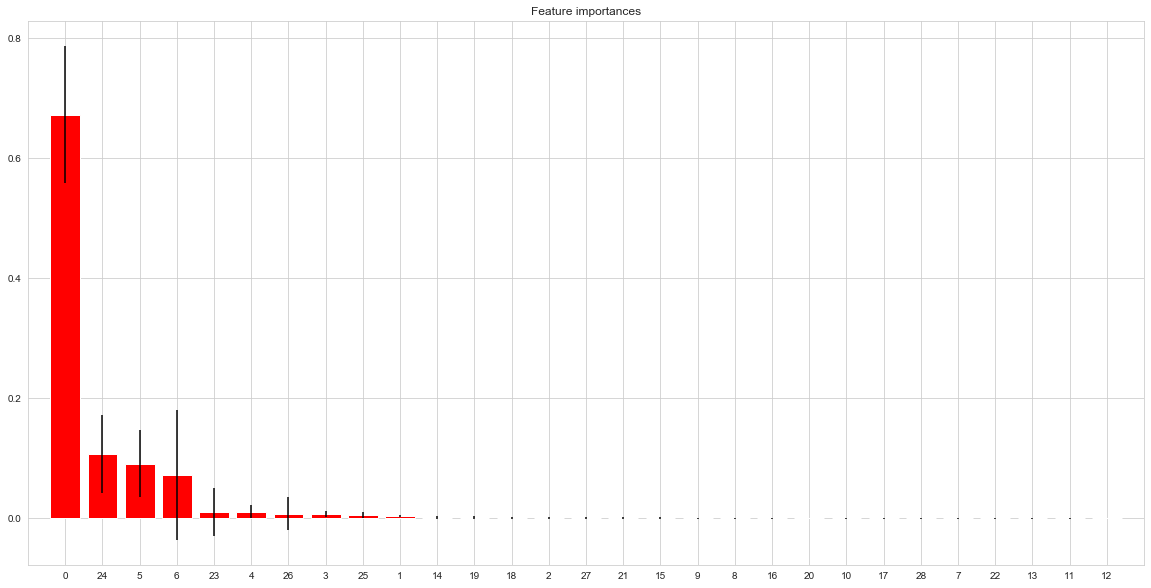

In [159]:
importances =forest_A.feature_importances_

std = np.std([tree.feature_importances_ for tree in forest_A.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_A.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
fig = plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X_train_A.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_A.shape[1]), indices)
plt.xlim([-1, X_train_A.shape[1]])

label_size = 20
plt.rcParams['xtick.labelsize'] = label_size 
plt.rcParams['ytick.labelsize'] = label_size 

plt.show()


Nous pouvons voir que l'ENERGY STAR Score (ici feature n°3) a un certain poids dans le modèle, mais son rôle est très petit par rapport aux 4 premières features : consommation totale d'énergie, ratio source / site, pourcentage d'utilisation de gaz,  ou la surface de bâtiment.